In [41]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.utils import all_estimators
import warnings
warnings.filterwarnings('ignore')

In [42]:
df = pd.read_csv('/Users/iseojun/Desktop/2학년 1학기/인공지능프로그래밍/final.csv')
df

,Unnamed: 0,sub_id,activity_id,act_level,hand_acc_x_mean,hand_acc_x_std,hand_acc_y_mean,hand_acc_y_std,hand_acc_z_mean,hand_acc_z_std,...,ankle_acc_y_mean,ankle_acc_y_std,ankle_acc_z_mean,ankle_acc_z_std,ankle_gyr_x_mean,ankle_gyr_x_std,ankle_gyr_y_mean,ankle_gyr_y_std,ankle_gyr_z_mean,ankle_gyr_z_std
0,3497,2,4,moderate,-12.040995,3.734766,3.069947,2.591651,1.161251,1.837110,...,0.068395,7.408032,-1.578947,3.224426,-0.089607,1.419706,-0.109581,0.823423,-0.033989,3.099118
1,14495,7,5,vigorous,-3.723040,10.188184,11.705779,17.220389,-1.367870,4.527840,...,4.774907,16.373748,-4.488213,13.319767,0.268098,2.850637,-0.214467,1.461636,0.173994,4.399006
2,14969,8,3,light,-9.275877,0.082824,1.006239,0.153816,2.709588,0.155286,...,-7.266617,0.080816,-1.471347,0.167118,-0.000961,0.039025,0.000421,0.028817,0.005620,0.017938
3,10111,5,5,vigorous,-4.493177,8.047408,9.519502,15.157397,2.644789,4.397889,...,4.253153,14.499693,-4.933189,5.644267,-0.075801,1.656742,-0.067246,1.173186,0.201805,4.822345
4,2422,2,2,light,-1.544933,0.176979,6.506689,0.157476,7.027291,0.151310,...,-2.435107,0.445737,-1.317451,0.891343,0.011485,0.289046,-0.030544,0.149178,0.013118,0.037660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7844,10708,6,2,light,-4.306831,0.087374,1.634235,0.082474,8.393767,0.110314,...,-1.152508,0.070008,-2.747617,0.101630,0.011747,0.025758,-0.006416,0.025480,0.003831,0.015409
7845,4870,3,2,light,-1.545991,0.086820,3.379703,0.093813,8.981813,0.103787,...,0.691999,0.070985,1.310246,0.109423,0.014554,0.024818,-0.000330,0.024905,0.006282,0.016639
7846,11822,6,4,moderate,-10.034760,1.780491,3.100475,1.319988,1.092313,0.994165,...,1.075183,8.284333,-2.815136,3.539439,-0.071975,1.670458,-0.017743,0.454644,0.204427,2.938931
7847,3866,2,4,moderate,-8.275569,3.245008,6.196727,4.417230,2.372815,1.843274,...,0.477373,11.093323,-2.393269,4.751164,0.004726,1.932653,-0.326306,0.950371,0.105722,3.513709


In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['act_level'] = le.fit_transform(df['act_level'])

In [44]:
df.head()

,Unnamed: 0,sub_id,activity_id,act_level,hand_acc_x_mean,hand_acc_x_std,hand_acc_y_mean,hand_acc_y_std,hand_acc_z_mean,hand_acc_z_std,...,ankle_acc_y_mean,ankle_acc_y_std,ankle_acc_z_mean,ankle_acc_z_std,ankle_gyr_x_mean,ankle_gyr_x_std,ankle_gyr_y_mean,ankle_gyr_y_std,ankle_gyr_z_mean,ankle_gyr_z_std
0,3497,2,4,1,-12.040995,3.734766,3.069947,2.591651,1.161251,1.837110,...,0.068395,7.408032,-1.578947,3.224426,-0.089607,1.419706,-0.109581,0.823423,-0.033989,3.099118
1,14495,7,5,2,-3.723040,10.188184,11.705779,17.220389,-1.367870,4.527840,...,4.774907,16.373748,-4.488213,13.319767,0.268098,2.850637,-0.214467,1.461636,0.173994,4.399006
2,14969,8,3,0,-9.275877,0.082824,1.006239,0.153816,2.709588,0.155286,...,-7.266617,0.080816,-1.471347,0.167118,-0.000961,0.039025,0.000421,0.028817,0.005620,0.017938
3,10111,5,5,2,-4.493177,8.047408,9.519502,15.157397,2.644789,4.397889,...,4.253153,14.499693,-4.933189,5.644267,-0.075801,1.656742,-0.067246,1.173186,0.201805,4.822345
4,2422,2,2,0,-1.544933,0.176979,6.506689,0.157476,7.027291,0.151310,...,-2.435107,0.445737,-1.317451,0.891343,0.011485,0.289046,-0.030544,0.149178,0.013118,0.037660


In [45]:
df.isnull().sum()

Unnamed: 0          0
sub_id              0
activity_id         0
act_level           0
hand_acc_x_mean     0
hand_acc_x_std      0
hand_acc_y_mean     0
hand_acc_y_std      0
hand_acc_z_mean     0
hand_acc_z_std      0
hand_gyr_x_mean     0
hand_gyr_x_std      0
hand_gyr_y_mean     0
hand_gyr_y_std      0
hand_gyr_z_mean     0
hand_gyr_z_std      0
chest_acc_x_mean    0
chest_acc_x_std     0
chest_acc_y_mean    0
chest_acc_y_std     0
chest_acc_z_mean    0
chest_acc_z_std     0
chest_gyr_x_mean    0
chest_gyr_x_std     0
chest_gyr_y_mean    0
chest_gyr_y_std     0
chest_gyr_z_mean    0
chest_gyr_z_std     0
ankle_acc_x_mean    0
ankle_acc_x_std     0
ankle_acc_y_mean    0
ankle_acc_y_std     0
ankle_acc_z_mean    0
ankle_acc_z_std     0
ankle_gyr_x_mean    0
ankle_gyr_x_std     0
ankle_gyr_y_mean    0
ankle_gyr_y_std     0
ankle_gyr_z_mean    0
ankle_gyr_z_std     0
dtype: int64

<Axes: xlabel='activity_id', ylabel='count'>

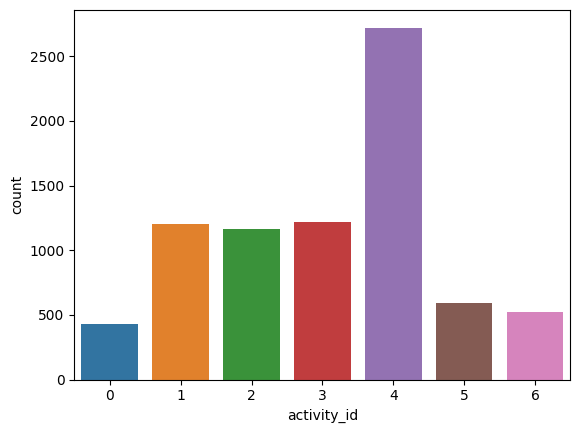

In [46]:
import seaborn as sns
sns.countplot(data=df,x="activity_id")

In [47]:
X = df.drop('activity_id', axis=1)
X = X.to_numpy()
y = df['activity_id']

In [48]:
from keras.utils import to_categorical
y = to_categorical(y)

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [50]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(80,input_shape=(39,),activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(7,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 80)                3200      
                                                                 
 dense_21 (Dense)            (None, 40)                3240      
                                                                 
 dense_22 (Dense)            (None, 20)                820       
                                                                 
 dense_23 (Dense)            (None, 7)                 147       
                                                                 
Total params: 7,407
Trainable params: 7,407
Non-trainable params: 0
_________________________________________________________________


In [51]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
197/197 [==============================] - 0s 679us/step - loss: 23.2680 - accuracy: 0.3313 - val_loss: 1.7682 - val_accuracy: 0.3439
Epoch 2/100
197/197 [==============================] - 0s 457us/step - loss: 1.7636 - accuracy: 0.3473 - val_loss: 1.7686 - val_accuracy: 0.3439
Epoch 3/100
197/197 [==============================] - 0s 449us/step - loss: 1.7660 - accuracy: 0.3473 - val_loss: 1.7694 - val_accuracy: 0.3439
Epoch 4/100
197/197 [==============================] - 0s 445us/step - loss: 1.7656 - accuracy: 0.3473 - val_loss: 1.7697 - val_accuracy: 0.3439
Epoch 5/100
197/197 [==============================] - 0s 446us/step - loss: 1.7661 - accuracy: 0.3473 - val_loss: 1.7763 - val_accuracy: 0.3439
Epoch 6/100
197/197 [==============================] - 0s 477us/step - loss: 1.7641 - accuracy: 0.3473 - val_loss: 1.7674 - val_accuracy: 0.3439
Epoch 7/100
197/197 [==============================] - 0s 453us/step - loss: 1.7641 - accuracy: 0.3473 - val_loss: 1.7770 - val_a

197/197 [==============================] - 0s 446us/step - loss: 1.7651 - accuracy: 0.3473 - val_loss: 1.7681 - val_accuracy: 0.3439
Epoch 58/100
197/197 [==============================] - 0s 447us/step - loss: 1.7632 - accuracy: 0.3473 - val_loss: 1.7682 - val_accuracy: 0.3439
Epoch 59/100
197/197 [==============================] - 0s 447us/step - loss: 1.7645 - accuracy: 0.3473 - val_loss: 1.7697 - val_accuracy: 0.3439
Epoch 60/100
197/197 [==============================] - 0s 449us/step - loss: 1.7640 - accuracy: 0.3473 - val_loss: 1.7694 - val_accuracy: 0.3439
Epoch 61/100
197/197 [==============================] - 0s 475us/step - loss: 1.7637 - accuracy: 0.3473 - val_loss: 1.7750 - val_accuracy: 0.3439
Epoch 62/100
197/197 [==============================] - 0s 460us/step - loss: 1.7647 - accuracy: 0.3473 - val_loss: 1.7703 - val_accuracy: 0.3439
Epoch 63/100
197/197 [==============================] - 0s 454us/step - loss: 1.7640 - accuracy: 0.3473 - val_loss: 1.7707 - val_accuracy

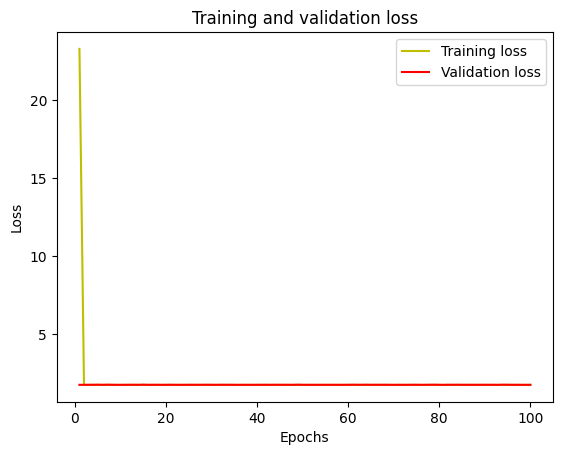

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

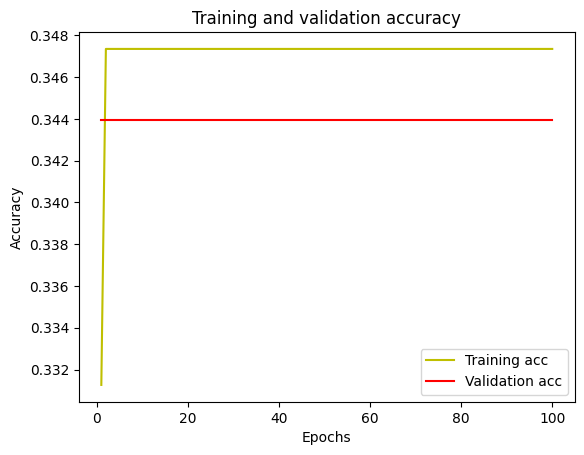

In [53]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [54]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        91
           1       0.00      0.00      0.00       248
           2       0.00      0.00      0.00       239
           3       0.00      0.00      0.00       231
           4       0.34      1.00      0.51       540
           5       0.00      0.00      0.00       114
           6       0.00      0.00      0.00       107

    accuracy                           0.34      1570
   macro avg       0.05      0.14      0.07      1570
weighted avg       0.12      0.34      0.18      1570

[[  0   0   0   0  91   0   0]
 [  0   0   0   0 248   0   0]
 [  0   0   0   0 239   0   0]
 [  0   0   0   0 231   0   0]
 [  0   0   0   0 540   0   0]
 [  0   0   0   0 114   0   0]
 [  0   0   0   0 107   0   0]]
